In [ ]:
import pandas as pd
df = pd.read_csv("top5-players.csv")
df.shape
df.isna().sum()

(2852, 37)
Rk             0
Player         0
Nation         3
Pos            0
Squad          0
Comp           0
Age            4
Born           4
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             1
npxG           1
xAG            1
npxG+xAG       1
PrgC           1
PrgP           1
PrgR           1
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          1
xAG_90         1
xG+xAG_90      1
npxG_90        1
npxG+xAG_90    1
dtype: int64


In [55]:
import pandas as pd
df = pd.read_csv("top5-players.csv")
df = df.drop_duplicates()
df = df.dropna()
df.to_csv("top5playersclean.csv", index=False)



In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("top5playersclean.csv")

df["goals_per_match"]   = np.where(df["MP"] > 0, df["Gls"] / df["MP"], np.nan)
df["assists_per_match"] = np.where(df["MP"] > 0, df["Ast"] / df["MP"], np.nan)
df["minutes_per_match"] = np.where(df["MP"] > 0, df["Min"] / df["MP"], np.nan)

df.shape
df[["goals_per_match","assists_per_match","minutes_per_match"]].describe().T

df.to_csv("top5playersclean.csv", index=False)


Shape: (2846, 40)
                    count       mean        std  min     25%        50%  \
goals_per_match    2846.0   0.069704   0.117810  0.0   0.000   0.000000   
assists_per_match  2846.0   0.050034   0.079439  0.0   0.000   0.000000   
minutes_per_match  2846.0  54.387091  26.098311  1.0  34.125  58.417308   

                         75%     max  
goals_per_match     0.100000   1.125  
assists_per_match   0.078947   1.000  
minutes_per_match  76.871538  90.000  
KPIs ajoutés et fichier sauvegardé


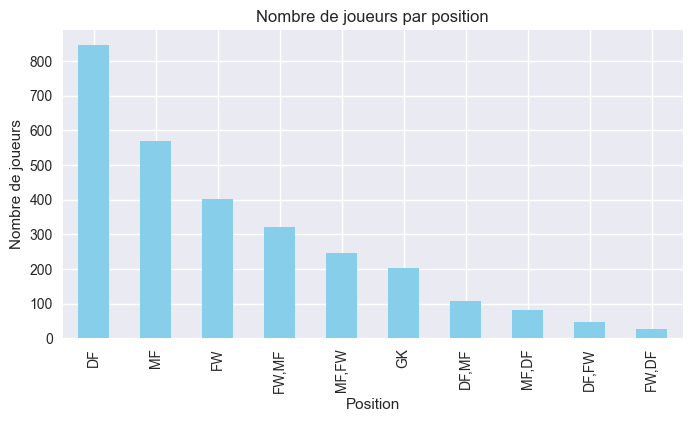

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("top5playersclean.csv")


df["Pos"].value_counts().plot(kind="bar", color="skyblue", figsize=(8,4))
plt.title("Nombre de joueurs par position")
plt.xlabel("Position")
plt.ylabel("Nombre de joueurs")
plt.show()

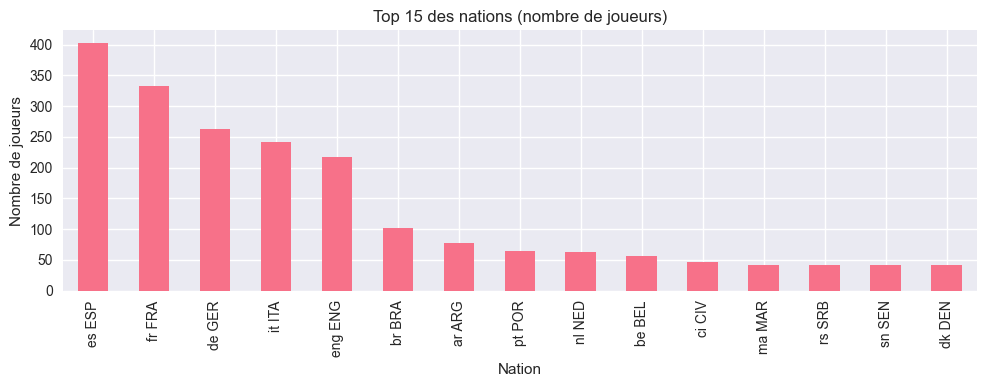

In [58]:
import matplotlib.pyplot as plt
topn = df["Nation"].value_counts().head(15)

plt.figure(figsize=(10,4))
topn.plot(kind="bar")
plt.title("Top 15 des nations (nombre de joueurs)")
plt.xlabel("Nation")
plt.ylabel("Nombre de joueurs")
plt.tight_layout()
plt.show()


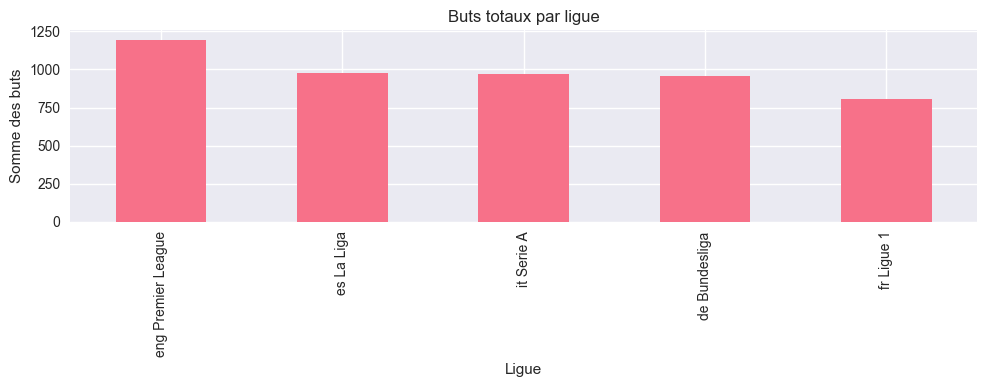

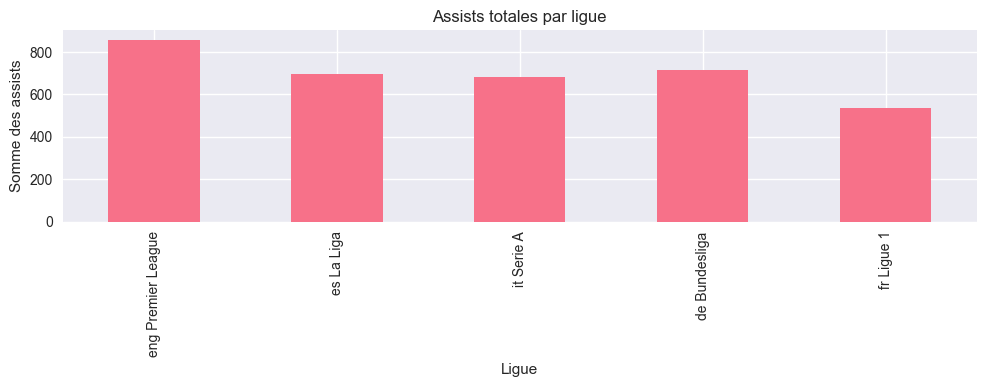

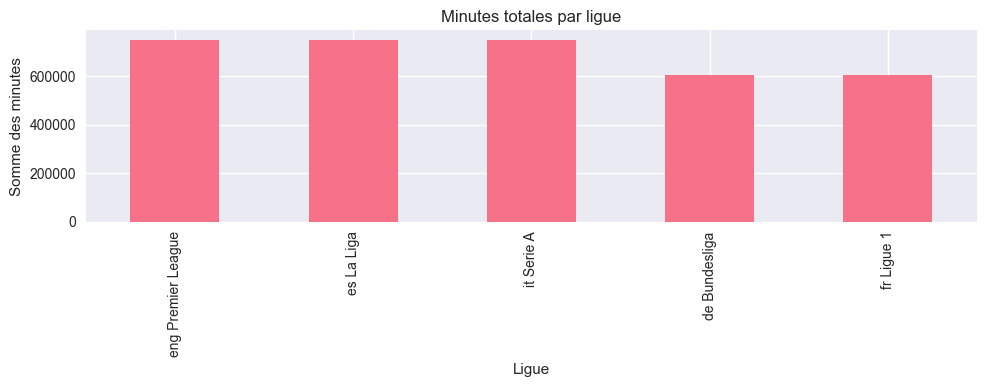

In [59]:
import matplotlib.pyplot as plt
by_league = df.groupby("Comp")[["Gls","Ast","Min"]].sum().sort_values("Gls", ascending=False)

plt.figure(figsize=(10,4))
by_league["Gls"].plot(kind="bar")
plt.title("Buts totaux par ligue")
plt.xlabel("Ligue")
plt.ylabel("Somme des buts")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
by_league["Ast"].plot(kind="bar")
plt.title("Assists totales par ligue")
plt.xlabel("Ligue")
plt.ylabel("Somme des assists")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
by_league["Min"].plot(kind="bar")
plt.title("Minutes totales par ligue")
plt.xlabel("Ligue")
plt.ylabel("Somme des minutes")
plt.tight_layout()
plt.show()


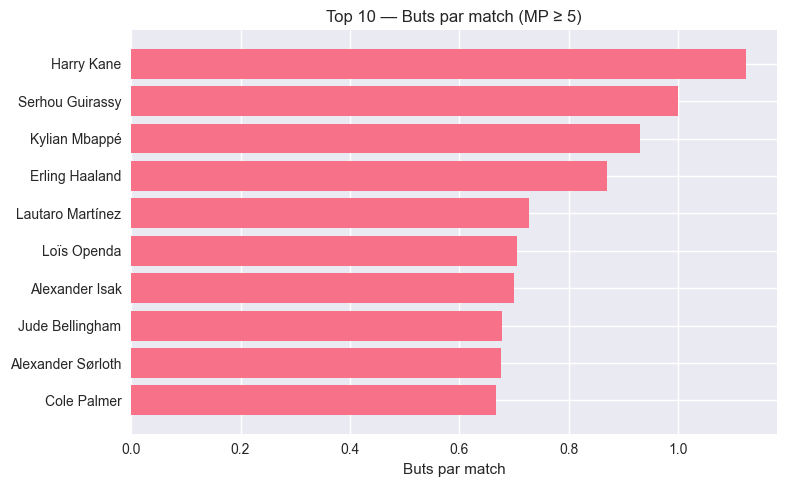

In [60]:
import numpy as np, matplotlib.pyplot as plt

subset = df[df["MP"] >= 5].copy()  
top = subset.sort_values("goals_per_match", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top["Player"], top["goals_per_match"])
plt.title("Top 10 — Buts par match (MP ≥ 5)")
plt.xlabel("Buts par match")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


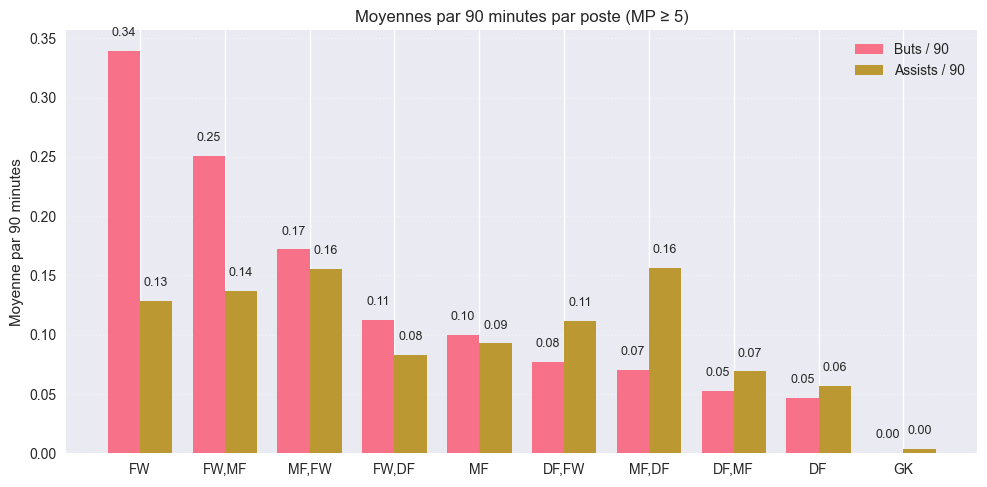

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("top5playersclean.csv")

data = df.loc[df["MP"] >= 5, ["Pos", "Gls_90", "Ast_90"]].dropna()
means = data.groupby("Pos")[ ["Gls_90", "Ast_90"] ].mean().sort_values("Gls_90", ascending=False)

pos_order = means.index.tolist()
x = np.arange(len(pos_order))
width = 0.38

plt.rcParams.update({"font.size": 11})
fig, ax = plt.subplots(figsize=(10, 5))

b1 = ax.bar(x - width/2, means["Gls_90"].values, width, label="Buts / 90")
b2 = ax.bar(x + width/2, means["Ast_90"].values, width, label="Assists / 90")

for bars in (b1, b2):
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.01, f"{h:.2f}", ha="center", va="bottom", fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(pos_order)
ax.set_ylabel("Moyenne par 90 minutes")
ax.set_title("Moyennes par 90 minutes par poste (MP ≥ 5)")
ax.grid(axis="y", linestyle=":", alpha=0.4)
ax.legend()
fig.tight_layout()

os.makedirs("./figs", exist_ok=True)
fig.savefig("./figs/bar_per90_by_pos.png", dpi=150, bbox_inches="tight")
plt.show()
